<a href="https://colab.research.google.com/github/samuel-charadias/Prova2-Garcia/blob/main/Trabalho_Predi%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.graph_objects as go
from prophet.plot import plot_plotly, plot_components_plotly
import yfinance as yf
import pandas as pd
from prophet import Prophet

## Download Yfinance Bitcoin

In [ ]:
btc = yf.download('BTC-USD')
eth = yf.download('ETH-USD')
sol = yf.download('sol-usd')

# Criar um DataFrame com datas de halving (aproximadas)
halvings = pd.DataFrame({
    'ds': pd.to_datetime(['2012-11-28', '2016-07-09', '2020-05-11', '2024-04-20']),
    'holiday': 'halving'
})


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Visualização das séries temporais

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=btc.index, y=btc['Adj Close'], mode='lines', name='Fechamento Ajustado'))
fig.update_layout(
    title='Fechamento Bitcoin (BTC-USD)',
    xaxis_title='Data',
    yaxis_title='Preço em USD',
    template='plotly_dark'
)
fig.show()

## Distribuição dos Retornos Diários
O Retorno Diário é uma métrica usada para medir a variação percentual no preço de um ativo de um dia para o outro.


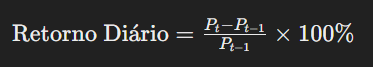

In [ ]:
# Calcula os retornos diários
btc['Daily Return'] =btc['Adj Close'].pct_change()

import plotly.express as px

# Cria um histograma dos retornos diários
fig = px.histogram(btc, x='Daily Return', nbins=50, title='Distribuição dos Retornos Diários do Bitcoin')

# Configura o layout do gráfico
fig.update_layout(
    xaxis_title='Retorno Diário',
    yaxis_title='Frequência',
    template='plotly_dark'
)

# Exibe o gráfico
fig.show()

## Volume de Negociação do Bitcoin
**Volume Crescente:** Um aumento no volume de negociação confirma a força de uma tendência (de alta ou de baixa). Se o preço do Bitcoin está subindo e o volume está aumentando, isso sugere que a tendência de alta é forte.

In [ ]:
# Cria uma figura
fig = go.Figure()

# Adiciona a série temporal do volume de negociação
fig.add_trace(go.Scatter(x=btc.index, y=btc['Volume'], mode='lines', name='Volume de Negociação', line=dict(color='blue')))
# Configura o layout do gráfico

fig.update_layout(
    title='Volume de Negociação do Bitcoin (BTC-USD)',
    xaxis_title='Data',
    yaxis_title='Volume',
    template='plotly_dark'
)

# Exibe o gráfico
fig.show()


Fechamento Ajustado e Médias Móveis:

O gráfico mostra o preço de fechamento ajustado do Bitcoin junto com as médias móveis simples e exponenciais de 20 e 50 dias. As médias móveis ajudam a suavizar as flutuações dos preços e identificar a tendência subjacente.

In [ ]:
# Calcula as médias móveis
btc['SMA_20'] = btc['Adj Close'].rolling(window=20).mean()
btc['SMA_50'] = btc['Adj Close'].rolling(window=50).mean()
btc['EMA_20'] = btc['Adj Close'].ewm(span=20, adjust=False).mean()
btc['EMA_50'] = btc['Adj Close'].ewm(span=50, adjust=False).mean()

# Plotando o fechamento ajustado e as médias móveis ao longo do tempo
fig = go.Figure()

# Fechamento Ajustado
fig.add_trace(go.Scatter(x=btc.index, y=btc['Adj Close'], mode='lines', name='Fechamento Ajustado'))

# SMA 20
fig.add_trace(go.Scatter(x=btc.index, y=btc['SMA_20'], mode='lines', name='SMA 20'))

# SMA 50
fig.add_trace(go.Scatter(x=btc.index, y=btc['SMA_50'], mode='lines', name='SMA 50'))

# EMA 20
fig.add_trace(go.Scatter(x=btc.index, y=btc['EMA_20'], mode='lines', name='EMA 20'))

# EMA 50
fig.add_trace(go.Scatter(x=btc.index, y=btc['EMA_50'], mode='lines', name='EMA 50'))
plot_plotly
# Configura o layout do gráfico
fig.update_layout(
    title='Fechamento Ajustado do Bitcoin com Médias Móveis (BTC-USD)',
    xaxis_title='Data',
    yaxis_title='Preço em USD',
    template='plotly_dark'
)

# Exibe o gráfico
fig.show()


## Suporte e resistência
O mais famoso e mais utilizado é o de suporte e resistência. Os suportes são regiões de preço que costumam atrair compradores sempre que a ação atinge aquele patamar. Ou seja, o papel sobe após atingir aquela cotação.
As resistências, ao contrário, são regiões de preços que costumam atrair vendas. Ou seja, a ação geralmente cai após bater naquela cotação.

In [ ]:

def get_support_resistance(data, window=20):
    rolling_max = data['High'].rolling(window=window).max()
    rolling_min = data['Low'].rolling(window=window).min()
    return rolling_max, rolling_min

btc['Resistance'], btc['Support'] = get_support_resistance(btc)

bitcoin_data_2024 = btc[btc.index.year == 2024]

btc['SMA_20'] = btc['Adj Close'].rolling(window=20).mean()

# Grafico Suporte e Resistencia Media 20 dias

In [ ]:


fig = go.Figure()


fig.add_trace(go.Scatter(x=bitcoin_data_2024.index, y=bitcoin_data_2024['Adj Close'], mode='lines', name='Fechamento Ajustado'))


fig.add_trace(go.Scatter(x=bitcoin_data_2024.index, y=bitcoin_data_2024['Resistance'], mode='lines', name='Resistência', line=dict(color='red', dash='dash')))


fig.add_trace(go.Scatter(x=bitcoin_data_2024.index, y=bitcoin_data_2024['Support'], mode='lines', name='Suporte', line=dict(color='green', dash='dash')))

fig.add_trace(go.Scatter(x=bitcoin_data_2024.index, y=bitcoin_data_2024['SMA_20'], mode='lines', name='Média Móvel de 20 dias', line=dict(color='yellow', dash='dot')))



fig.update_layout(
    title='Fechamento Ajustado do Bitcoin com Suporte, Resistência, Médias Móveis e Níveis de Fibonacci (BTC-USD, 2024)',
    xaxis_title='Data',
    yaxis_title='Preço em USD',
    template='plotly_dark'
)

fig.update_layout(
    title='Fechamento Ajustado do Bitcoin com Suporte e Resistência (BTC-USD, 2024)',
    xaxis_title='Data',
    yaxis_title='Preço em USD',
    template='plotly_dark'
)

# Exibe o gráfico
fig.show()

# Prediçao de Series Temporais com Prophet Meta
*  ## 200 Dias









In [ ]:
btc.reset_index(inplace=True)
btc = btc[["Date","Adj Close"]]
btc.columns = ['ds', 'y']
btc['SMA_20'] = btc['y'].rolling(window=20).mean()
btc['SMA_50'] = btc['y'].rolling(window=50).mean()
def get_support_resistance(data, window=20):
    rolling_max = data['y'].rolling(window=window).max()
    rolling_min = data['y'].rolling(window=window).min()
    return rolling_max, rolling_min
btc['Resistance'], btc['Support'] = get_support_resistance(btc)

<ipython-input-93-18b81a85a843>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-18b81a85a843>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-18b81a85a843>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-93-18b81a

## Configuraçao modelo Prophet  + Halvin
### Halvin
### Feriados EUA
**changepoint_prior_scale**  Padrão 0,05 Controla a flexibilidade das mudanças na tendência.

**seasonality_mode **
Additive: A sazonalidade é adicionada à tendência. Isso é apropriado quando a amplitude da sazonalidade não depende do nível da série temporal.

**Multiplicative:** A sazonalidade é multiplicada pela tendência. Isso é útil quando a amplitude da sazonalidade aumenta ou diminui proporcionalmente ao nível da série temporal.

**seasonality_prior_scale**  0 a 10, Padrão 10. Valores maiores permitem que o modelo capture variações sazonais mais pronunciadas.

**holidays_prior_scale**  0 a 10 Padrão 10. Valores maiores permitem que o modelo capture efeitos de feriados mais significativos.

In [ ]:
mb = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0
)

halvings = pd.DataFrame({
    'ds': pd.to_datetime(['2012-11-28', '2016-07-09', '2020-05-11', '2024-04-20']),
    'holiday': 'halving'
})
mb.add_country_holidays(country_name='US')
mb.fit(btc)

future = mb.make_future_dataframe(periods=200)

future = future.merge(halvings, on='ds', how='left')

future['holiday'] = future['holiday'].fillna(0)

forecast = mb.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzyt6bg6e/m1hupkrb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzyt6bg6e/z2zbp_x7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28806', 'data', 'file=/tmp/tmpzyt6bg6e/m1hupkrb.json', 'init=/tmp/tmpzyt6bg6e/z2zbp_x7.json', 'output', 'file=/tmp/tmpzyt6bg6e/prophet_modela9_evb7v/prophet_model-20240613003201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Grafico Plotly Modelo + Halvin

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=btc['ds'], y=btc['y'], mode='lines', name='Histórico'))


fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Previsão'))


fig.add_trace(go.Scatter(x=btc['ds'], y=btc['SMA_20'], mode='lines', name='Média Móvel de 20 dias'))

fig.add_trace(go.Scatter(x=btc['ds'], y=btc['Support'], mode='lines', name='Suporte'))

fig.add_trace(go.Scatter(x=btc['ds'], y=btc['Resistance'], mode='lines', name='Resistência'))

fig.update_layout(
    title='Previsão de Preços do Bitcoin',
    xaxis_title='Data',
    yaxis_title='Preço (USD)',
    template='plotly_dark'
)

fig.show()


## Configuraçao modelo Prophet Padrao

In [ ]:
btc_1 = yf.download('BTC-USD')

btc_1.reset_index(inplace=True)
btc_1['Date'] = pd.to_datetime(btc_1['Date'])
btc_1 = btc_1[["Date","Adj Close"]]
btc_1.columns = ['ds', 'y']
mb_1 = Prophet()
mb_1.fit(btc_1)
futurb_1 = mb_1.make_future_dataframe(periods=200)
forecastb_1 = mb_1.predict(futurb_1)
forecastb_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

[*********************100%%**********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzyt6bg6e/9v1oj2ps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzyt6bg6e/pkb1mgqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27083', 'data', 'file=/tmp/tmpzyt6bg6e/9v1oj2ps.json', 'init=/tmp/tmpzyt6bg6e/pkb1mgqv.json', 'output', 'file=/tmp/tmpzyt6bg6e/prophet_model0wj1tz3s/prophet_model-20240613003204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
3751,2024-12-26,63468.015736,53749.530934,71952.190800
3752,2024-12-27,63572.300888,54313.976070,72427.052526
3753,2024-12-28,63705.066140,54511.619619,72081.825692
3754,2024-12-29,63845.105761,54332.651365,71432.236452
3755,2024-12-30,64028.412673,55397.124393,72294.687373


## Grafico Plotly Modelo Padrao

In [ ]:

pio.templates.default = "plotly_dark"

fig = plot_plotly(mb, forecastb_1)


fig.update_layout(
    title='Previsão de Preços do Bitcoin',
    xaxis_title='Data',
    yaxis_title='Preço (USD)'
)

fig.show()

## Separaçao de Treino e Teste

In [ ]:
train_size = int(len(btc) * 0.8)
train = btc[:train_size]
test = btc[train_size:]

## Traino e Teste --- Modelo Com Influencia do Halvin

In [ ]:
model1 = Prophet(
    changepoint_prior_scale=0.05,
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0
)

model1.add_country_holidays(country_name='US')

model1.fit(train)


future1 = model1.make_future_dataframe(periods=len(test))

future1 = future1.merge(halvings, on='ds', how='left')

future1['holiday'] = future1['holiday'].fillna(0)

forecast1 = mb.predict(future1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzyt6bg6e/_u7ab78n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzyt6bg6e/5j52cl5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42453', 'data', 'file=/tmp/tmpzyt6bg6e/_u7ab78n.json', 'init=/tmp/tmpzyt6bg6e/5j52cl5j.json', 'output', 'file=/tmp/tmpzyt6bg6e/prophet_modeluzmp0qwy/prophet_model-20240613003207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Traino e Teste --- Modelo Padrao sem Halvin



In [ ]:
model2 = Prophet()
model2.fit(train)

future2 = model2.make_future_dataframe(periods=len(test))
forecast2 = model2.predict(future2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzyt6bg6e/qhf6d6gw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzyt6bg6e/ky5wjsu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29883', 'data', 'file=/tmp/tmpzyt6bg6e/qhf6d6gw.json', 'init=/tmp/tmpzyt6bg6e/ky5wjsu7.json', 'output', 'file=/tmp/tmpzyt6bg6e/prophet_modelb0z159e_/prophet_model-20240613003211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Calculamos o erro absoluto médio (MAE) e o erro quadrático médio (MSE) para comparar a acurácia dos modelos.

In [ ]:
y_true = test['y'].values
y_pred1 = forecast1['yhat'][-len(test):].values
y_pred2 = forecast2['yhat'][-len(test):].values

mae1 = mean_absolute_error(y_true, y_pred1)
mse1 = mean_squared_error(y_true, y_pred1)
mae2 = mean_absolute_error(y_true, y_pred2)
mse2 = mean_squared_error(y_true, y_pred2)

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=test['ds'], y=y_true, mode='lines', name='Real'))


fig.add_trace(go.Scatter(x=test['ds'], y=y_pred1, mode='lines', name='+ Halvin', line=dict(color='yellow')))


fig.add_trace(go.Scatter(x=test['ds'], y=y_pred2, mode='lines', name='Padrão', line=dict(color='red')))

fig.update_layout(
    title='Comparação de Previsões do Bitcoin',
    xaxis_title='Data',
    yaxis_title='Preço (USD)',
    template='plotly_dark',
    annotations=[
        dict(
            x=test['ds'].iloc[-1],
            y=y_pred1[-1],
            xref="x",
            yref="y",
            text=f"MAE Model 1: {mae1:.2f}",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x=test['ds'].iloc[-1],
            y=y_pred2[-1],
            xref="x",
            yref="y",
            text=f"MAE Model 2: {mae2:.2f}",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-80
        )
    ]
)


fig.show()